## CONDICIONES DEL MODELO LOGÍSTICO

La regresión logística no requiere de ciertas condiciones como linealidad, normalidad y homocedasticidad de los residuos que sí lo son para la regresión lineal. Las principales condiciones que este modelo requiere son:

• Respuesta binaria: La variable dependiente ha de ser binaria.

• Independencia: las observaciones han de ser independientes.

• Multicolinealidad: se requiere de muy poca a ninguna multicolinealidad entre los predictores (para regresión logística múltiple).

• Linealidad entre la variable independiente y el logaritmo natural de odds.

• Tamaño muestral: como regla general, se requiere un mínimo de 10 casos con el resultado menos frecuente para cada variable independiente del modelo

* **Variance Inflation Factor:** Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. Mathematically, the VIF for a regression model variable is equal to the ratio of the overall model variance to the variance of a model that includes only that single independent variable. This ratio is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

* **Area Under The Curve Receiver Operating Characteristics (ROC AUC Curve):**  is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

* **RFE Recursive Feature Elimination:** Is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.There are two important configuration options when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of these hyperparameters can be explored, although the performance of the method is not strongly dependent on these hyperparameters being configured well.
    * RFE is an efficient approach for eliminating features from a training dataset for feature selection.
    * How to use RFE for feature selection for classification and regression predictive modeling problems.
    * How to explore the number of selected features and wrapped algorithm used by the RFE procedure.

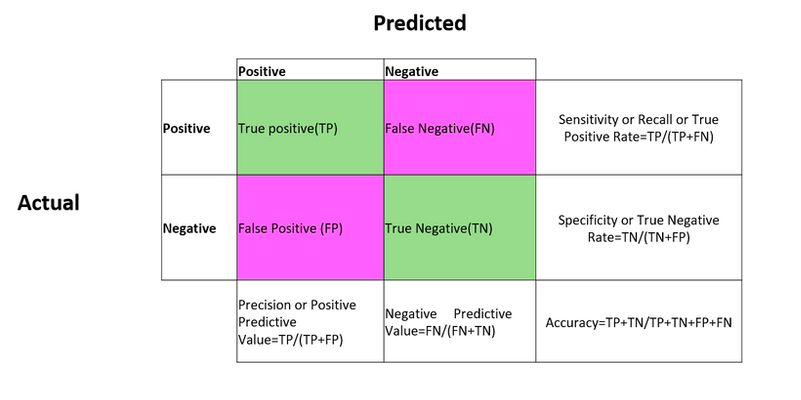

In [8]:
from IPython.display import Image
Image(filename='confusion matrix5.png')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, r2_score

import pickle 
import joblib
import os

In [2]:
df = pd.read_csv('customer_data.csv')
df2 = pd.read_csv('internet_data.csv')
df3 = pd.read_csv('churn_data.csv')

In [3]:
df = df.merge(df2, how='inner', on='customerID')
df = df.merge(df3, how='inner', on='customerID')

In [4]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.where(x==' ', np.nan, x))
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.dropna(how='any',axis=0, inplace=True)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7031 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7031 non-null   object 
 1   gender            7031 non-null   object 
 2   SeniorCitizen     7031 non-null   int64  
 3   Partner           7031 non-null   object 
 4   Dependents        7031 non-null   object 
 5   MultipleLines     7031 non-null   object 
 6   InternetService   7031 non-null   object 
 7   OnlineSecurity    7031 non-null   object 
 8   OnlineBackup      7031 non-null   object 
 9   DeviceProtection  7031 non-null   object 
 10  TechSupport       7031 non-null   object 
 11  StreamingTV       7031 non-null   object 
 12  StreamingMovies   7031 non-null   object 
 13  tenure            7031 non-null   int64  
 14  PhoneService      7031 non-null   object 
 15  Contract          7031 non-null   object 
 16  PaperlessBilling  7031 non-null   object 


In [7]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [8]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'tenure',
 'PhoneService',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
binary_ = ['PaperlessBilling','PhoneService','Partner','Churn','Dependents']

def binary_conversion(x):
    return x.map({'Yes': 1, 'No': 0})
df[binary_] = df[binary_].apply(binary_conversion)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,No phone service,DSL,No,Yes,No,...,No,No,1,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,No,DSL,Yes,No,Yes,...,No,No,34,1,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,No,DSL,Yes,Yes,No,...,No,No,2,1,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,No phone service,DSL,Yes,No,Yes,...,No,No,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,No,Fiber optic,No,No,No,...,No,No,2,1,Month-to-month,1,Electronic check,70.70,151.65,1


In [11]:
multiple_l = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
ml = multiple_l.drop(['MultipleLines_No phone service'], 1)
df = pd.concat([df, ml], axis=1)

In [12]:
internet_service = pd.get_dummies(df.InternetService)
internet_service = internet_service.drop(['No'], axis=1)
df = pd.concat([df, internet_service], axis=1)

In [13]:
On_sec = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
On_sec = On_sec.drop(['OnlineSecurity_No internet service'], 1)
df = pd.concat([df, On_sec], axis=1)

In [14]:
dev_protection = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dev_protection = dev_protection.drop(['DeviceProtection_No internet service'], 1)
df = pd.concat([df, dev_protection], axis=1)

In [15]:
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
df = pd.concat([df,ts1], axis=1)

st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
df = pd.concat([df,st1], axis=1)

sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
df = pd.concat([df,sm1], axis=1)

In [16]:
def gender_mapping(x):
    return x.map({'Female': 1, 'Male': 0})
df['gender'] = df[['gender']].apply(gender_mapping)

In [17]:
cc = pd.get_dummies(df.Contract)
df = pd.concat([df,cc], axis=1)

In [18]:
# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

pm = pd.get_dummies(df.PaymentMethod)
# Adding the results to the master dataframe
df = pd.concat([df,pm], axis=1)

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies_Yes,Month-to-month,One year,Two year,OnlineBackup_No,OnlineBackup_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,1,0,1,0,No phone service,DSL,No,Yes,No,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,0,0,0,0,No,DSL,Yes,No,Yes,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,No,DSL,Yes,Yes,No,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,0,0,0,0,No phone service,DSL,Yes,No,Yes,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,No,Fiber optic,No,No,No,...,0,1,0,0,1,0,0,0,1,0


In [24]:
df = df.drop(['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 
                              'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'], axis=1)
df = df.drop(['PaymentMethod','Contract'], axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].copy()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

## Feature scaling

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
to_scale = ['tenure','MonthlyCharges','TotalCharges']
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])

In [30]:
X_train.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_Yes,Month-to-month,One year,Two year,OnlineBackup_No,OnlineBackup_Yes,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
2597,0,0,1,0,1.545815,1,1,1.473859,2.429975,0,...,1,0,1,0,0,1,0,0,1,0
3311,1,0,0,0,0.612665,0,1,-0.670625,-0.095449,0,...,0,1,0,0,0,1,0,0,1,0
562,0,0,1,1,-1.050776,1,0,0.153412,-0.793130,1,...,1,1,0,0,1,0,0,1,0,0
1049,1,0,0,0,-1.294206,1,0,-1.502937,-1.011210,1,...,0,1,0,0,0,0,0,0,0,1
3406,1,0,0,0,-0.077054,1,0,-1.459915,-0.719734,1,...,0,0,1,0,0,0,0,0,0,1


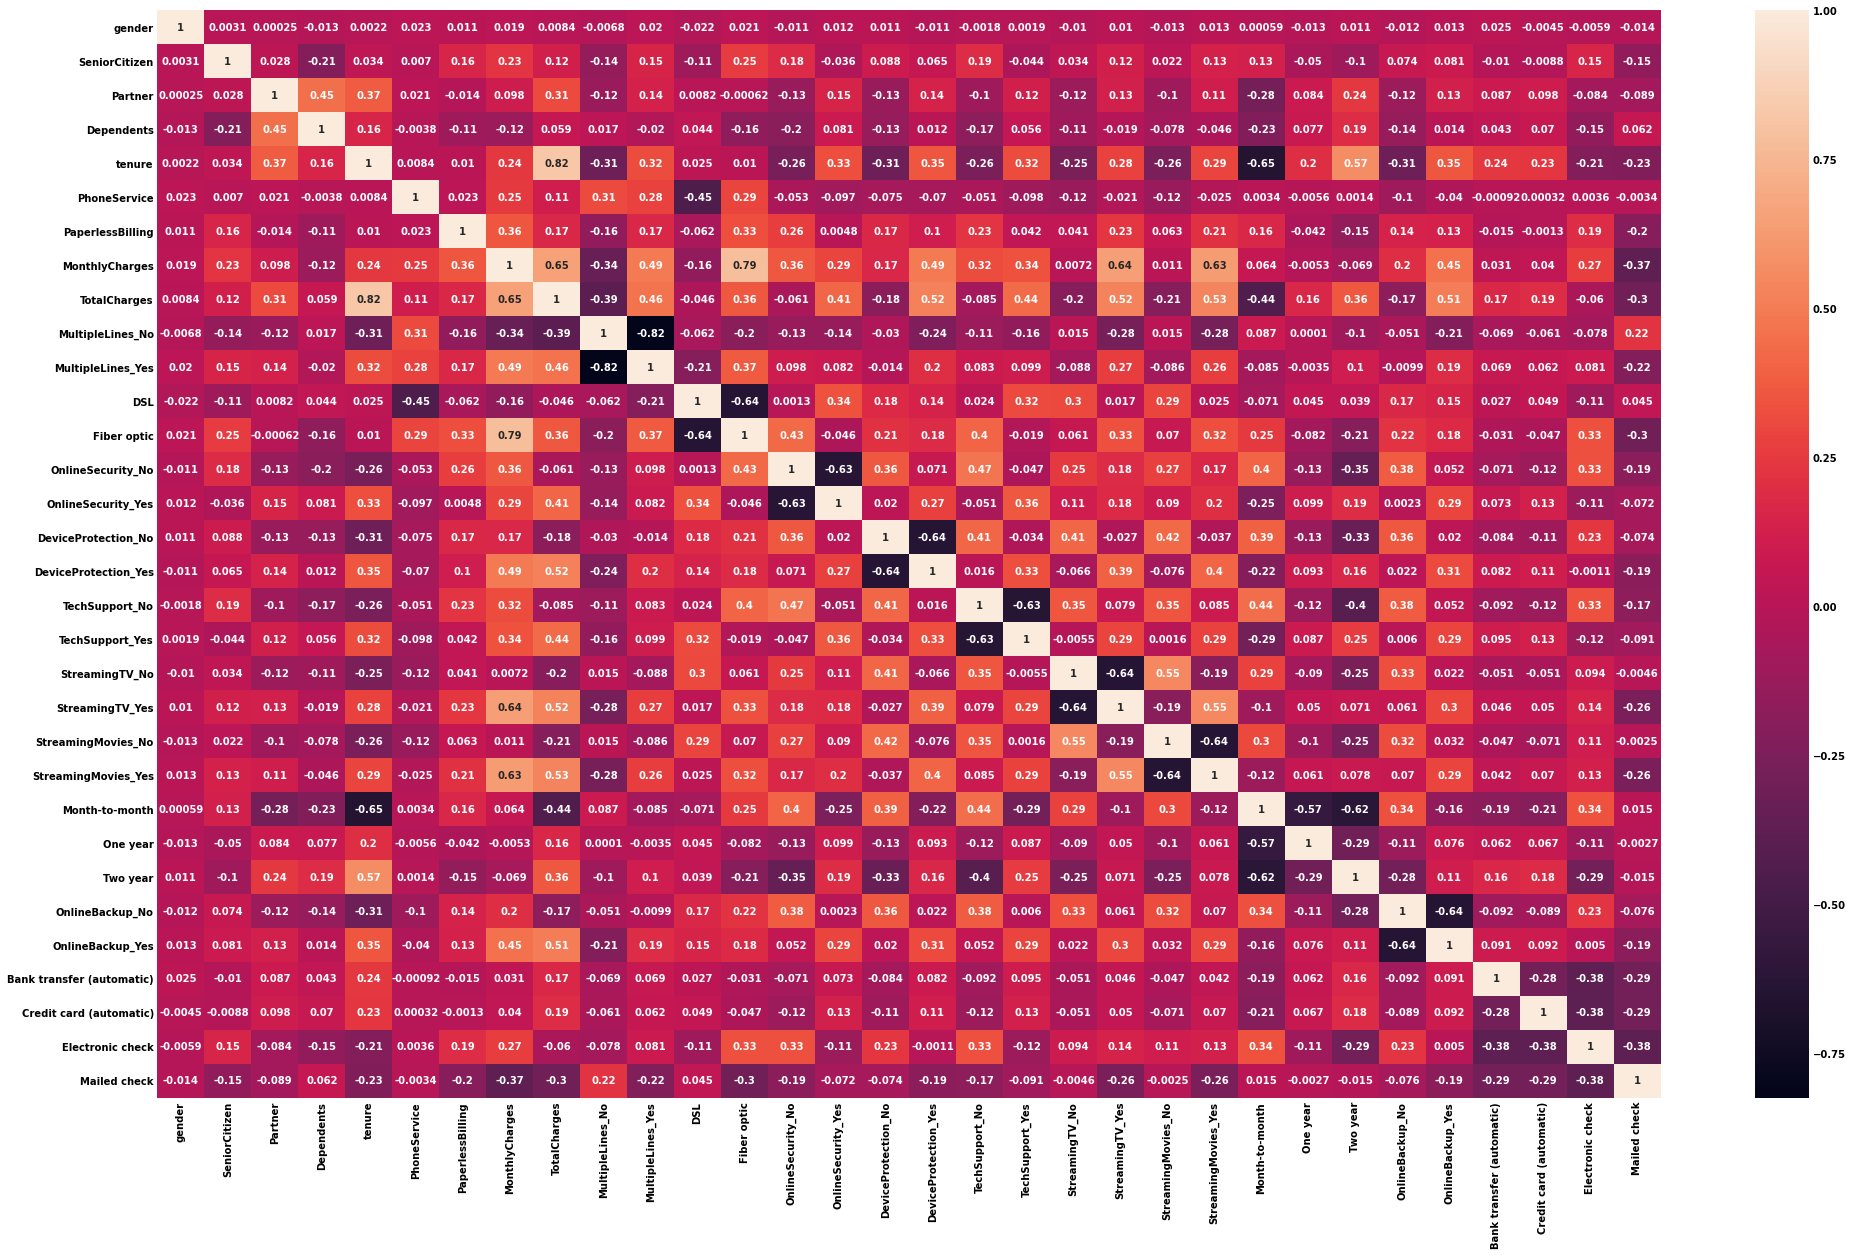

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [35]:
correlated = ['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 
                 'StreamingTV_No', 'StreamingMovies_No']
X_train = X_train.drop(correlated, axis=1)
X_test = X_test.drop(correlated, axis=1)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [38]:
log_reg = LogisticRegression()
rfe = RFE(log_reg, 15)
rfe = rfe.fit(X_train, y_train)

In [39]:
rfe_df = pd.DataFrame({'columns': list(X_train.columns), 'rank' : rfe.ranking_, 'support' : rfe.support_ }).sort_values(by='rank', ascending=True)
rfe_df

,columns,rank,support
12,OnlineSecurity_Yes,1,True
14,TechSupport_Yes,1,True
13,DeviceProtection_Yes,1,True
23,Electronic check,1,True
11,Fiber optic,1,True
10,DSL,1,True
17,Month-to-month,1,True
8,TotalCharges,1,True
19,Two year,1,True
6,PaperlessBilling,1,True


In [40]:
rfe_columns = X_train.columns[rfe.support_]

In [46]:
import statsmodels.api as sm
def get_lrm(y_train, x_train):
    lrm = sm.GLM(y_train, (sm.add_constant(x_train)), family = sm.families.Binomial())
    lrm = lrm.fit()
    print(lrm.summary())
    return lrm

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['vif'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif = vif.sort_values(by='vif', ascending=False)
    print(vif)

## Model 1

In [48]:
X_train_lg_1 = X_train[rfe_columns]
log_reg_1 = get_lrm(y_train, X_train_lg_1)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.4
Date:                Thu, 17 Jun 2021   Deviance:                       4016.7
Time:                        08:24:37   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2115 

In [53]:
X_train_lg_2 = X_train_lg_1.drop(['Fiber optic','DSL'], axis=1)
log_reg_2 = get_lrm(y_train, X_train_lg_2)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2009.7
Date:                Thu, 17 Jun 2021   Deviance:                       4019.3
Time:                        08:27:27   Pearson chi2:                 6.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6588 

**All variables are significan, check VIF of the variables**

In [55]:
calculate_vif(X_train_lg_2)

                Features    vif
5           TotalCharges  10.16
1                 tenure   6.90
2           PhoneService   4.57
9         Month-to-month   4.26
4         MonthlyCharges   3.68
3       PaperlessBilling   2.68
10              Two year   2.37
7   DeviceProtection_Yes   2.10
11      OnlineBackup_Yes   2.06
8        TechSupport_Yes   1.90
12      Electronic check   1.84
6     OnlineSecurity_Yes   1.76
0          SeniorCitizen   1.30


In [57]:
X_train_lg_3 = X_train_lg_2.drop(['TotalCharges'], axis=1)
log_reg_4 = get_lrm(y_train, X_train_lg_3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2019.9
Date:                Thu, 17 Jun 2021   Deviance:                       4039.8
Time:                        08:30:36   Pearson chi2:                 5.21e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6432 

In [58]:
calculate_vif(X_train_lg_3)

                Features   vif
2           PhoneService  4.57
8         Month-to-month  4.25
3       PaperlessBilling  2.68
1                 tenure  2.37
9               Two year  2.35
6   DeviceProtection_Yes  2.08
10      OnlineBackup_Yes  2.03
7        TechSupport_Yes  1.88
11      Electronic check  1.82
5     OnlineSecurity_Yes  1.75
4         MonthlyCharges  1.63
0          SeniorCitizen  1.30


In [60]:
y_train_pred = log_reg_4.predict(sm.add_constant(X_train_lg_3))
y_train_pred_values = y_train_pred.values.reshape(-1)

In [61]:
churn_df = pd.DataFrame({'Churn_actual': y_train.values, 'Churn_prob' : y_train_pred_values})
churn_df['Cust_ID'] = y_train.index
churn_df.head()

,Churn_actual,Churn_prob,Cust_ID
0,0,0.007799,132
1,0,0.218054,6206
2,0,0.007448,5096
3,0,0.013340,3752
4,0,0.123655,3820


In [63]:
def calc_predict(row, tresh):
    if row >= tresh:
        return 1
    else: 
        return 0

In [64]:
churn_df['Churn_Pred'] = churn_df.Churn_prob.apply(lambda row: 1 if row >= 0.5 else 0)

In [65]:
churn_df.head()

,Churn_actual,Churn_prob,Cust_ID,Churn_Pred
0,0,0.007799,132,0
1,0,0.218054,6206,0
2,0,0.007448,5096,0
3,0,0.013340,3752,0
4,0,0.123655,3820,0


In [66]:
from sklearn import metrics

In [69]:
cnf_matrix = metrics.confusion_matrix(churn_df.Churn_actual, churn_df.Churn_Pred)
cnf_matrix

array([[3267,  364],
       [ 579,  711]])

In [70]:
print('Accuracy of the model : ', metrics.accuracy_score(churn_df.Churn_actual, churn_df.Churn_Pred))

Accuracy of the model :  0.8083722820564926


In [71]:
print('Recall : ', metrics.recall_score(churn_df.Churn_actual, churn_df.Churn_Pred))

Recall :  0.5511627906976744


In [72]:
print('Precision : ', metrics.precision_score(churn_df.Churn_actual, churn_df.Churn_Pred))

Precision :  0.6613953488372093


In [75]:
tn = cnf_matrix[0,0]
fn = cnf_matrix[1,0]
fp = cnf_matrix[0,1]
tp = cnf_matrix[1,1]
print(tp)
print(tn)

711
3267


In [76]:
# Sensistivity , True Positive rate
print('Sensitivity (True Positive Rate) TP / TP + FN : ', tp / (tp + fn))

Sensitivity (True Positive Rate) TP / TP + FN :  0.5511627906976744


In [77]:
# specificity, 
print('Specificity TN / (TN + FP) : ', tn / (tn + fp))

Specificity TN / (TN + FP) :  0.8997521343982374


In [78]:
# False positive rate
print('False positive rate FP / (TN + FP) : ', fp / (tn+fp))

False positive rate FP / (TN + FP) :  0.1002478656017626


In [80]:
def draw_roc_curve(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

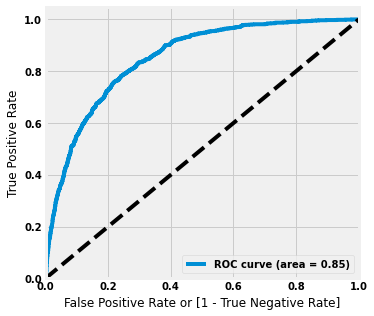

In [81]:
draw_roc_curve(churn_df.Churn_actual, churn_df.Churn_prob)


In [82]:
# to the predict for different tresholds
tresholds = [float(x)/10 for x in range(10)]
tresholds.append(0.45)
tresholds.append(0.55)
tresholds = sorted(tresholds)
for i in sorted(tresholds):
    churn_df[i] = churn_df.Churn_prob.map(lambda row: 1 if row > i else 0)
churn_df.head()

,Churn_actual,Churn_prob,Cust_ID,Churn_Pred,0.0,0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9
0,0,0.007799,132,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.218054,6206,0,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.007448,5096,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.013340,3752,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.123655,3820,0,1,1,0,0,0,0,0,0,0,0,0,0


In [84]:
optimal_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for i in tresholds:
    cm = metrics.confusion_matrix(churn_df.Churn_actual, churn_df[i])
    tn = cm[0,0]
    fn = cm[1,0]
    fp = cm[0,1]
    tp = cm[1,1]
    accuracy = (tn + tp) / (tn + tp + fp + fn)
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    optimal_df.loc[i] = [i, accuracy, sensitivity, specificity]

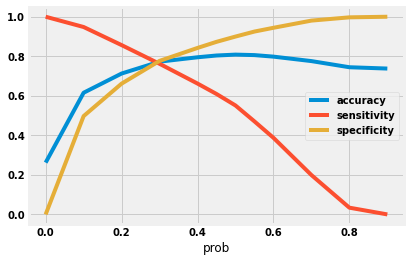

In [85]:
optimal_df.plot(x = 'prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

In [86]:
optimal_value = 0.3
churn_df['final_pred'] = churn_df.Churn_prob.map(lambda x: 1 if x > 0.3 else 0)
churn_df.head()

,Churn_actual,Churn_prob,Cust_ID,Churn_Pred,0.0,0.1,0.2,0.3,0.4,0.45,0.5,0.55,0.6,0.7,0.8,0.9,final_pred
0,0,0.007799,132,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.218054,6206,0,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.007448,5096,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.013340,3752,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.123655,3820,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
# calcualte the accuracy
final_accuracy = metrics.accuracy_score(churn_df.Churn_actual, churn_df.final_pred)
print('Final Accuracy : ', final_accuracy)

Final Accuracy :  0.7728104043893518


In [90]:
# calcualte the other parameters
final_cm = metrics.confusion_matrix(churn_df.Churn_actual, churn_df.final_pred)
print('Confusion matric \n', final_cm)

Confusion matric 
 [[2820  811]
 [ 307  983]]


In [92]:
tn = final_cm[0,0]
fn = final_cm[1,0]
fp = final_cm[0,1]
tp = final_cm[1,1]

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
false_positive_rate = 1 - specificity
positive_predictive_rate = tp / (tp + fp)
negative_predictive_rate = tn / (tn + fn)

print('optimal treshold : ', optimal_value)
print('sensitivity : ', sensitivity)
print('specificity : ', specificity)
print('false_positive_rate : ', false_positive_rate)
print('positive_predictive_rate : ', positive_predictive_rate)
print('negative_predictive_rate : ', negative_predictive_rate)

optimal treshold :  0.3
sensitivity :  0.762015503875969
specificity :  0.7766455521894795
false_positive_rate :  0.2233544478105205
positive_predictive_rate :  0.5479375696767002
negative_predictive_rate :  0.9018228333866326


In [93]:
con_cm = metrics.confusion_matrix(churn_df.Churn_actual, churn_df.Churn_Pred)
con_cm

array([[3267,  364],
       [ 579,  711]])

In [94]:
# recall
recall = con_cm[1,1] / (con_cm[1,1] + con_cm[1,0])
print('Recall : ', recall)

Recall :  0.5511627906976744


In [95]:
# precision
precision = con_cm[1,1] / (con_cm[1,1] + con_cm[0,1])
print('precision : ', precision)

precision :  0.6613953488372093


In [96]:
# precision and recall trade off
from sklearn.metrics import precision_recall_curve

In [97]:
p, r, tresholds = precision_recall_curve(churn_df.Churn_actual, churn_df.Churn_prob)

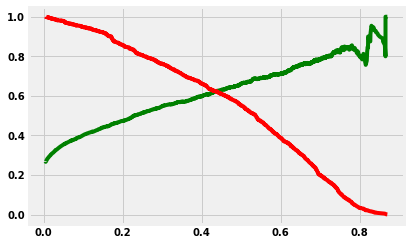

In [98]:
plt.plot(tresholds, p[:-1], 'g-')
plt.plot(tresholds, r[:-1], 'r-')
plt.show()

In [114]:
X_test[to_scale] = scaler.transform(X_test[to_scale])
X_test = X_test[X_train_lg_3.columns]
X_test.head()

,SeniorCitizen,tenure,PhoneService,PaperlessBilling,MonthlyCharges,OnlineSecurity_Yes,DeviceProtection_Yes,TechSupport_Yes,Month-to-month,Two year,OnlineBackup_Yes,Electronic check
2678,0,-1.339550,1,0,-2.202915,0,0,0,0,0,0,0
4130,0,-1.372472,0,0,-2.184790,0,0,1,1,0,1,1
1180,0,-1.324736,1,1,-2.169949,0,0,1,0,1,0,0
555,0,-1.296753,1,1,-2.149195,1,1,0,0,0,0,0
5565,0,-1.359303,0,1,-2.181723,0,1,0,1,0,0,1


In [115]:
# predict the X_test
y_test_pred = log_reg_4.predict(sm.add_constant(X_test))

In [116]:
test_pred_df = pd.DataFrame(y_test)
test_pred_df.head()

,Churn
2678,0
4130,0
1180,0
555,0
5565,1


In [117]:
y_test_df = pd.DataFrame(y_test_pred)
y_test_df['CustID'] = y_test_df.index
y_test_df.head()

,0,CustID
2678,0.051980,2678
4130,0.158423,4130
1180,0.019461,1180
555,0.033475,555
5565,0.334647,5565


In [118]:
y_test_df.reset_index(drop= True, inplace=True)
test_pred_df.reset_index(drop=True, inplace=True)

In [119]:
test_pred_final_df = pd.concat([ test_pred_df, y_test_df], axis=1)
test_pred_final_df.head()

,Churn,0,CustID
0,0,0.051980,2678
1,0,0.158423,4130
2,0,0.019461,1180
3,0,0.033475,555
4,1,0.334647,5565


In [120]:
test_pred_final_df= test_pred_final_df.rename(columns={0 : 'Churn_Prob', 'Churn': 'Churn_Actual'})
test_pred_final_df.head()

,Churn_Actual,Churn_Prob,CustID
0,0,0.051980,2678
1,0,0.158423,4130
2,0,0.019461,1180
3,0,0.033475,555
4,1,0.334647,5565


In [121]:
test_pred_final_df['Churn_final_pred'] = test_pred_final_df.Churn_Prob.map(lambda x : 1 if x > 0.42 else 0)
test_pred_final_df.head()

,Churn_Actual,Churn_Prob,CustID,Churn_final_pred
0,0,0.051980,2678,0
1,0,0.158423,4130,0
2,0,0.019461,1180,0
3,0,0.033475,555,0
4,1,0.334647,5565,0


In [122]:
test_accuracy = metrics.accuracy_score(test_pred_final_df.Churn_Actual, test_pred_final_df.Churn_final_pred)
print('Test accuracy : ', test_accuracy)

Test accuracy :  0.7260663507109004


In [123]:
test_cm = metrics.confusion_matrix(test_pred_final_df.Churn_Actual, test_pred_final_df.Churn_final_pred)
test_cm

array([[1529,    2],
       [ 576,    3]])

In [124]:
print('Test Sensitivity : ', test_cm[1,1] / (test_cm[1,1] + test_cm[1,0]))
print('Test Specificity : ', test_cm[0,0] / (test_cm[0,0] + test_cm[0,1]))

Test Sensitivity :  0.0051813471502590676
Test Specificity :  0.9986936642717178


In [126]:
print('Final model parameters : ', X_train_lg_3.columns)

Final model parameters :  Index(['SeniorCitizen', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'OnlineSecurity_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'Month-to-month', 'Two year', 'OnlineBackup_Yes',
       'Electronic check'],
      dtype='object')
